In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np


In [3]:
from table_evaluator import TableEvaluator

In [4]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on fake.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

## Dia Samples

In [ ]:
real
tgan_org_evaluator.fake
wgan_evaluator.fake
skip_evaluator.fake
medgan_evaluator.fake
tablegan_evaluator.fake

In [ ]:
sample_tgan = tgan_org_evaluator.fake.sample(50)
sample_tgan['model'] = 'tgan'

sample_wgan = wgan_evaluator.fake.sample(50)
sample_wgan['model'] = 'wgan'

sample_skip = skip_evaluator.fake.sample(50)
sample_skip['model'] = 'skip'

sample_medgan = medgan_evaluator.fake.sample(50)
sample_medgan['model'] = 'medgan'

sample_tablegan = tablegan_evaluator.fake.sample(50)
sample_tablegan['model'] = 'tablegan'

total_sample = pd.concat([sample_tgan, sample_wgan, sample_skip, sample_medgan, sample_tablegan])
total_sample['real'] = None
total_sample = total_sample.sort_values('trans_date')
# num_cols = total_sample._get_numeric_data().columns.tolist()
# total_sample[num_cols] = total_sample[num_cols].astype('int')
total_sample = total_sample[total_sample.trans_amount > 0]
total_sample

In [32]:
total_sample = total_sample.round({'trans_amount': 1, 'balance_after_trans': 1})

In [33]:
tar_dir = '../final_data/dia_samples'
for name in ['v1', 'v2', 'v3', 'v4', 'v5']:
    g = total_sample.sample(50).sort_values('trans_date')
#     num_cols = g._get_numeric_data().columns.tolist()
#     g[num_cols] = g[num_cols].astype('int')
    g.to_csv(f'{tar_dir}/sample_{name}_ground_truth.csv', index=False, sep=';')
    g.drop(['model'], axis=1).to_csv(f'{tar_dir}/sample_{name}.csv', index=False, sep=';')

In [12]:
berka_real = pd.read_csv('../data/berka/berka_cat.csv', sep=';')

C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
berka_sample = berka_real.sample(50).drop(['trans_bank_partner', 'trans_account_partner'], axis=1).sort_values('trans_date')
berka_sample.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
14053,193374,655,14.6,42460.8,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,272
44255,185206,628,4543.0,24705.1,CREDIT,CREDIT_IN_CASH,UNKNOWN,431
89345,788247,2687,3830.0,27822.6,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,621
114825,857875,2924,5100.0,29689.1,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,713
120072,3094834,10266,6000.0,68292.3,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,730


In [23]:
berka_sample.to_csv('../final_data/dia_samples/berka_real.csv', index=False, sep=';')

In [9]:
evaluators = [tgan_org_evaluator, wgan_evaluator, skip_evaluator, medgan_evaluator, tablegan_evaluator]

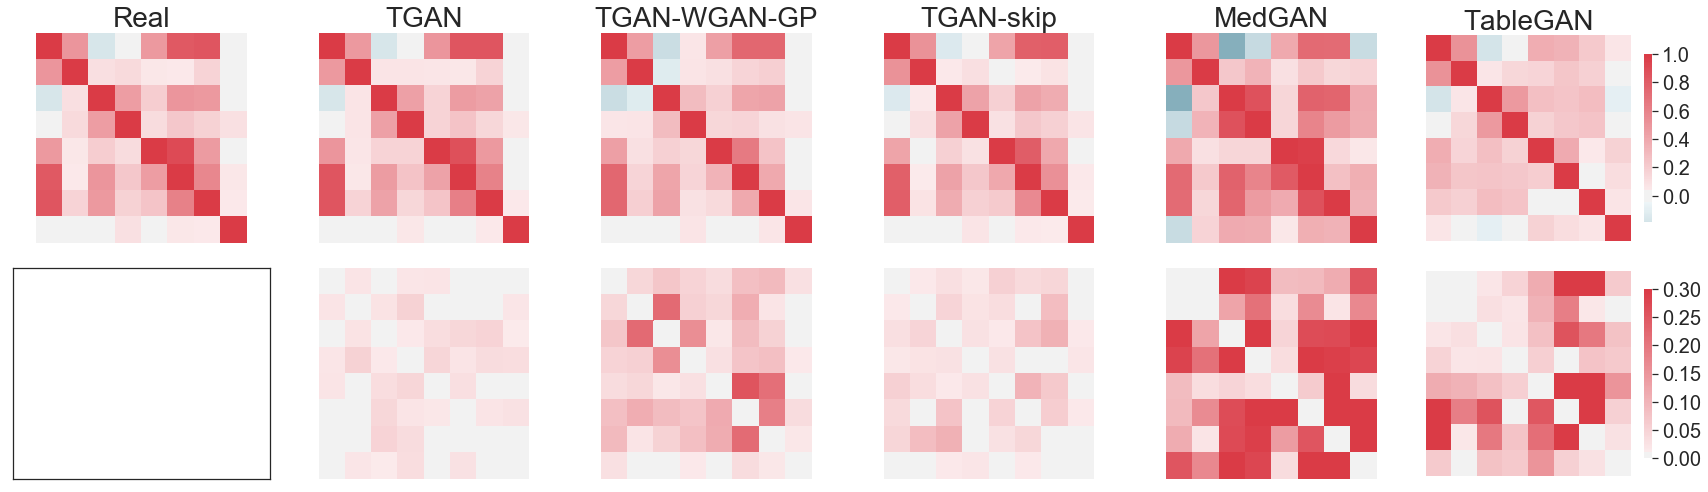

In [14]:
evaluators = [tgan_org_evaluator, wgan_evaluator, skip_evaluator, medgan_evaluator, tablegan_evaluator]
plot_correlation_comparison(evaluators, annot=False)
plt.savefig('../Master-Thesis/images/results/berka_correlations.png')

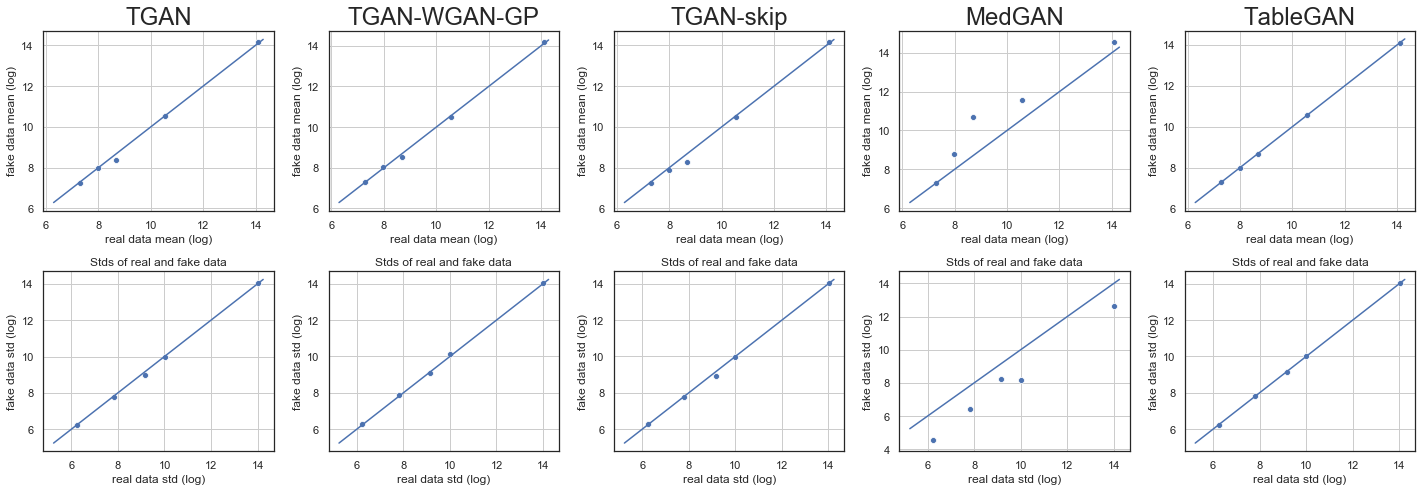

In [82]:
plot_mean_std_comparison(evaluators)
plt.savefig('../Master-Thesis/images/results/berka_mean_std.png')

In [13]:
real.sample(15).to_csv('real_sample.csv', index=False)

In [14]:
fake.sample(15).to_csv('fake_sample.csv', index=False)

In [22]:
real.dtypes

trans_id                 int64
account_id               int64
trans_amount           float64
balance_after_trans    float64
trans_type              object
trans_operation         object
trans_k_symbol          object
trans_date               int64
dtype: object

In [25]:
column_correlations(real[:1000], fake[:1000], ['trans_type', 'trans_operation', 'trans_k_symbol'])

0.7851154866807328

# Berka

## Original TGAN

In [81]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan.csv')
tgan_org_evaluator = DataEvaluator(real, fake)

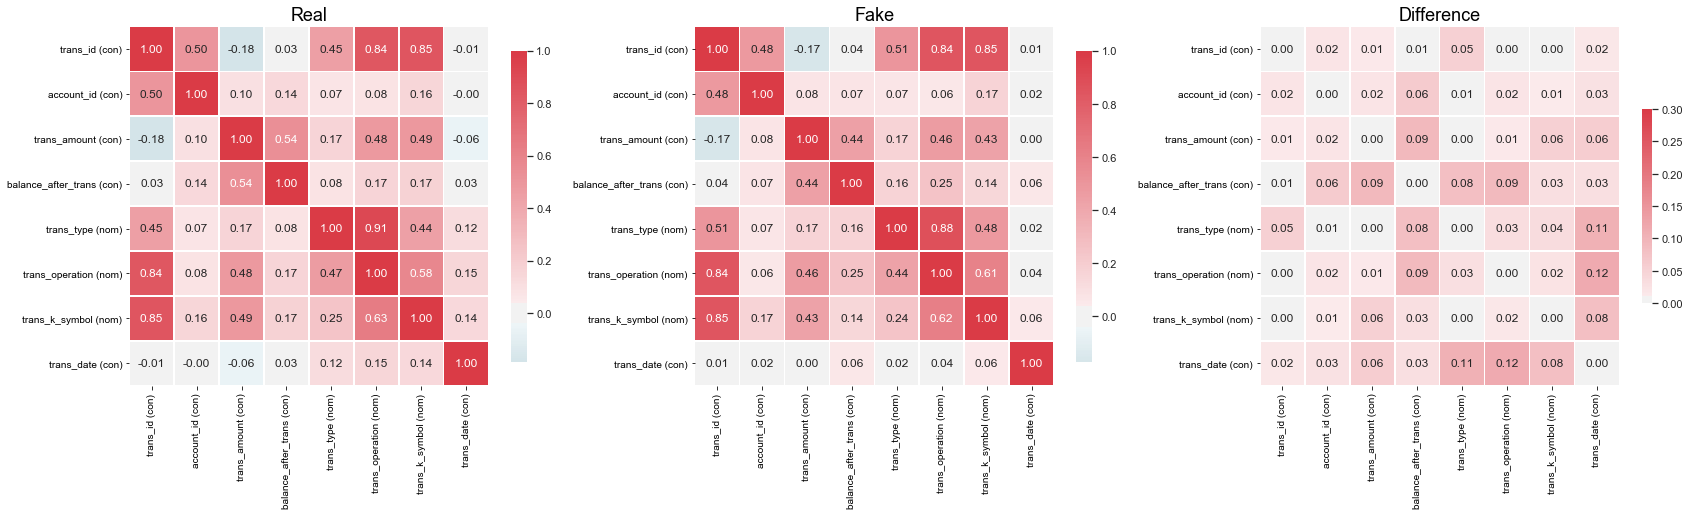

In [7]:
tgan_org_evaluator.plot_correlation_difference()

In [82]:
tgan_evaluator = TableEvaluator(real, fake, n_samples=10000, verbose=True)

In [83]:
tgan_evaluator.estimator_evaluation(target_col='trans_type')


Fitting real
1: LogisticRegression
2: RandomForestClassifier
3: DecisionTreeClassifier
4: MLPClassifier

Fitting fake
1: LogisticRegression
2: RandomForestClassifier
3: DecisionTreeClassifier
4: MLPClassifier

Classifier F1-scores:
                                       real    fake
real_data_LogisticRegression_F1      0.7520  0.6985
real_data_RandomForestClassifier_F1  0.9890  0.9885
real_data_DecisionTreeClassifier_F1  0.9835  0.9590
real_data_MLPClassifier_F1           0.5365  0.5550
fake_data_LogisticRegression_F1      0.7225  0.8005
fake_data_RandomForestClassifier_F1  0.9830  0.9845
fake_data_DecisionTreeClassifier_F1  0.9680  0.9625
fake_data_MLPClassifier_F1           0.7710  0.7705


0.9691427857548295

In [84]:
tgan_evaluator.estimators_scores

,real,fake
real_data_LogisticRegression_F1,0.7520,0.6985
real_data_RandomForestClassifier_F1,0.9890,0.9885
real_data_DecisionTreeClassifier_F1,0.9835,0.9590
real_data_MLPClassifier_F1,0.5365,0.5550
fake_data_LogisticRegression_F1,0.7225,0.8005
fake_data_RandomForestClassifier_F1,0.9830,0.9845
fake_data_DecisionTreeClassifier_F1,0.9680,0.9625
fake_data_MLPClassifier_F1,0.7710,0.7705


In [38]:
u = tgan_org_evaluator.pca_correlation(return_values=True)

In [23]:
tgan_org_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [24]:
tgan_org_evaluator.get_duplicates()

(0, 0)

In [29]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7631 0.7677
real_data_RandomForestClassifier_F1 0.9868 0.9853
real_data_DecisionTreeClassifier_F1 0.9823 0.9604
real_data_MLPClassifier_F1          0.5499 0.5499
fake_data_LogisticRegression_F1     0.7761 0.7874
fake_data_RandomForestClassifier_F1 0.9775 0.9807
fake_data_DecisionTreeClassifier_F1 0.9566 0.9650
fake_data_MLPClassifier_F1          0.5915 0.5915

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0488
Column Correlation distance MAE   0.0348
Duplicate rows between sets       2.0000
nearest neighbor mean             0.3742
nearest neighbor std              0.2806

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9910
Correlation column correlations                 0.9821

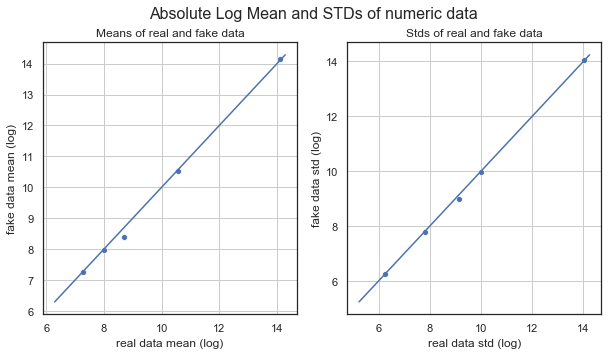

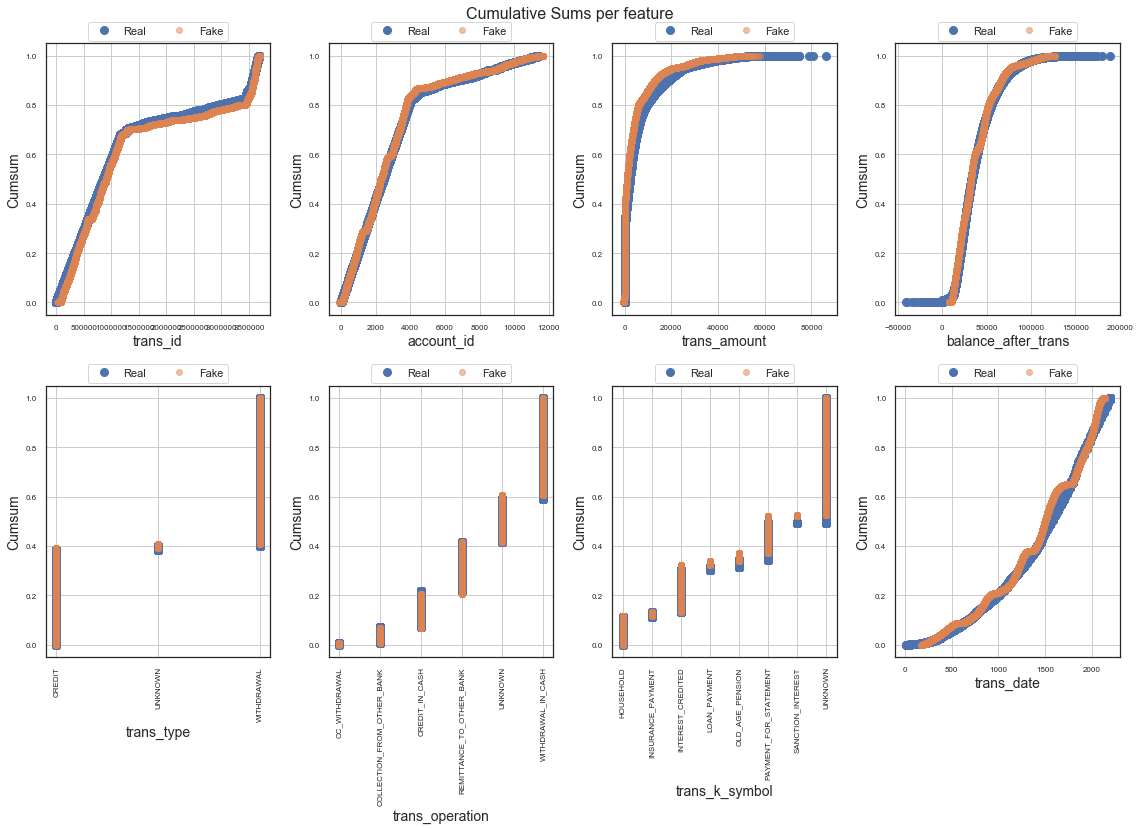

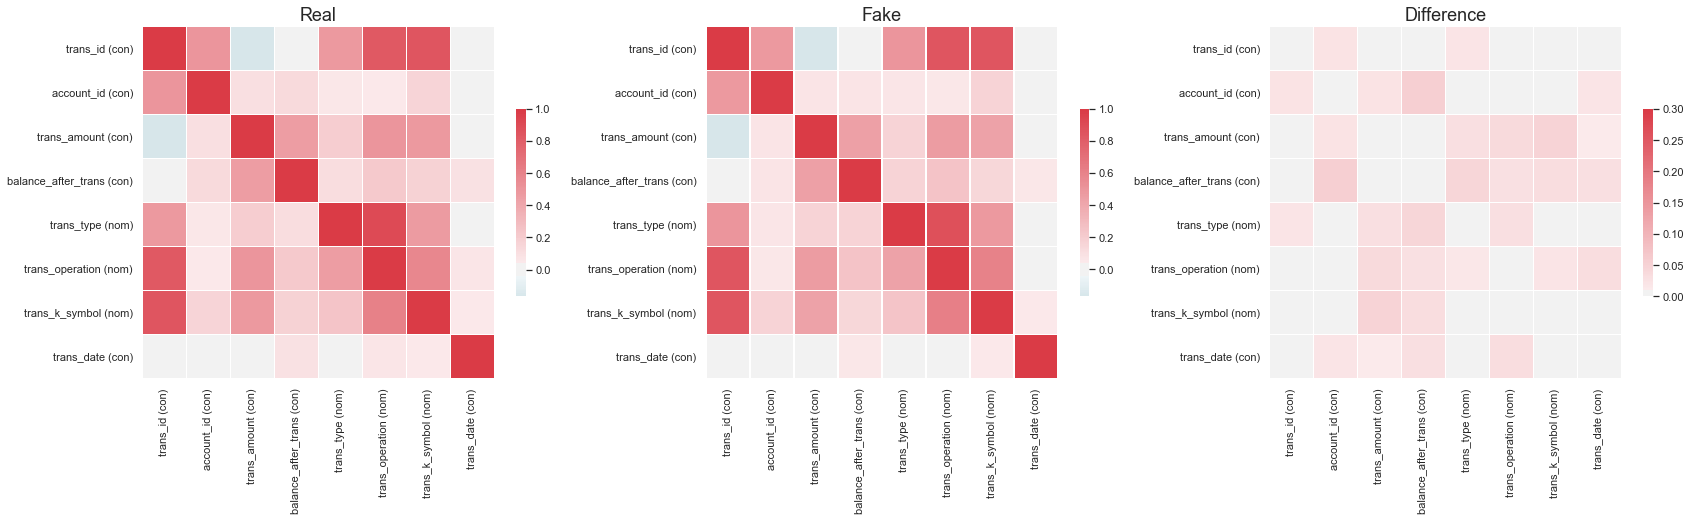

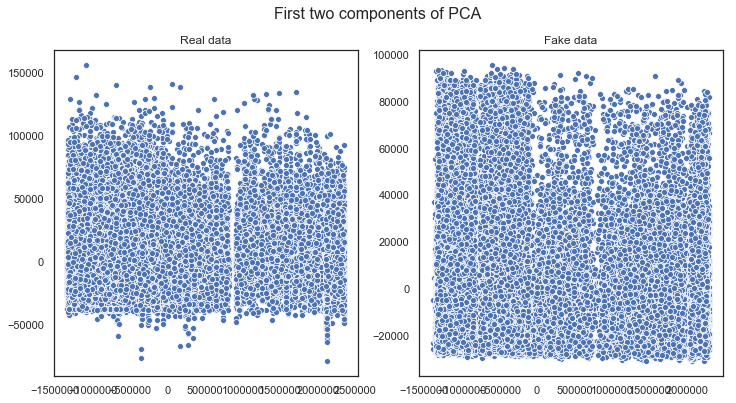

In [14]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP

In [7]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-wgan-gp.csv')
wgan_evaluator = DataEvaluator(real, fake)

In [ ]:
wgan_evaluator_2 = TableEvaluator(real, fake)

wgan_evaluator_2.get_duplicates()

In [14]:
wgan_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [41]:
wgan_evaluator.statistical_evaluation()

0.9954887218045112

In [26]:
wgan_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [27]:
wgan_evaluator.get_duplicates()

(0, 0)

In [31]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7685 0.7353
real_data_RandomForestClassifier_F1 0.9859 0.9748
real_data_DecisionTreeClassifier_F1 0.9802 0.9238
real_data_MLPClassifier_F1          0.5521 0.5526
fake_data_LogisticRegression_F1     0.7128 0.7258
fake_data_RandomForestClassifier_F1 0.9237 0.9406
fake_data_DecisionTreeClassifier_F1 0.9042 0.9082
fake_data_MLPClassifier_F1          0.5947 0.5951

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0983
Column Correlation distance MAE   0.0703
Duplicate rows between sets       2.0000
nearest neighbor mean             0.4733
nearest neighbor std              0.4030

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9955
Correlation column correlations                 0.9470

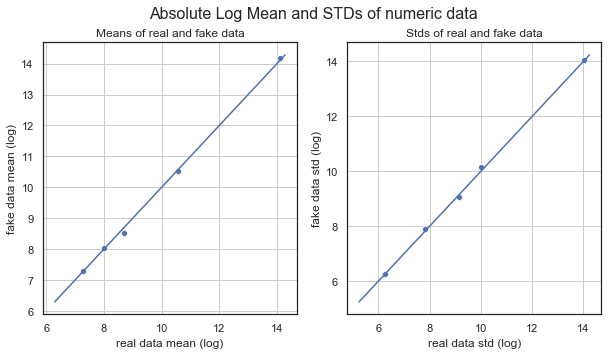

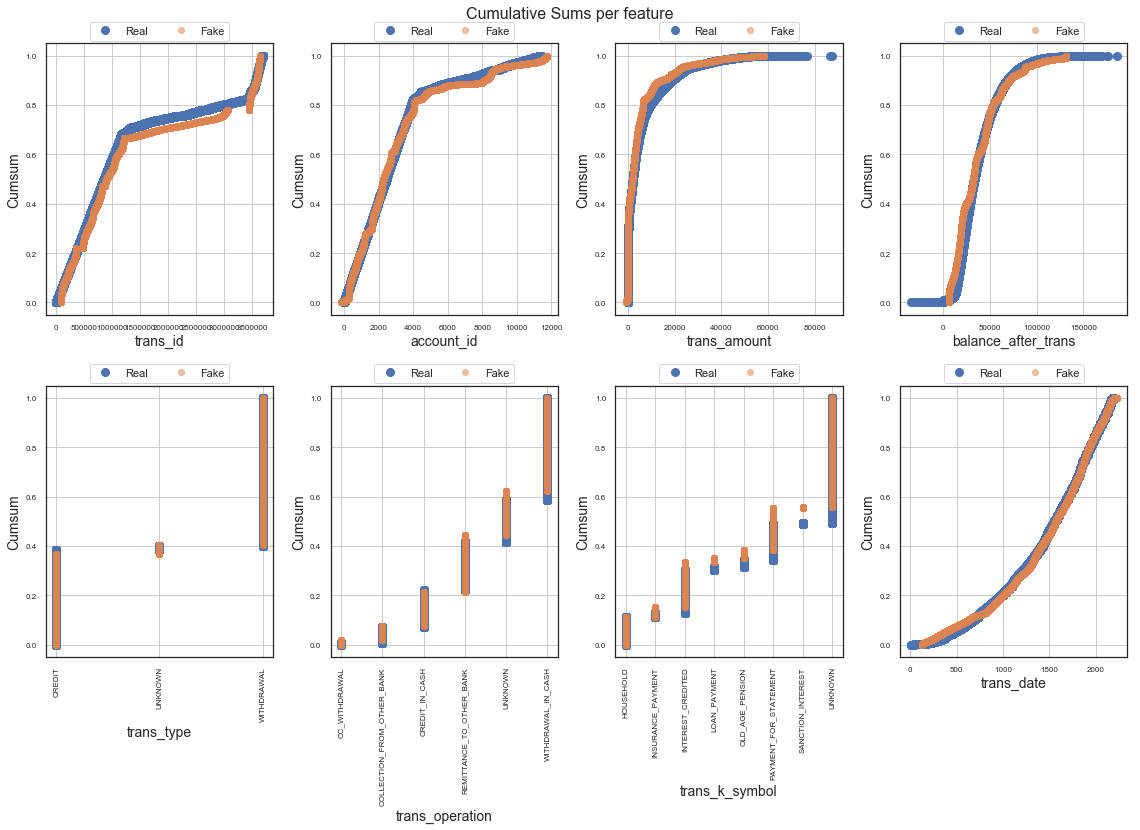

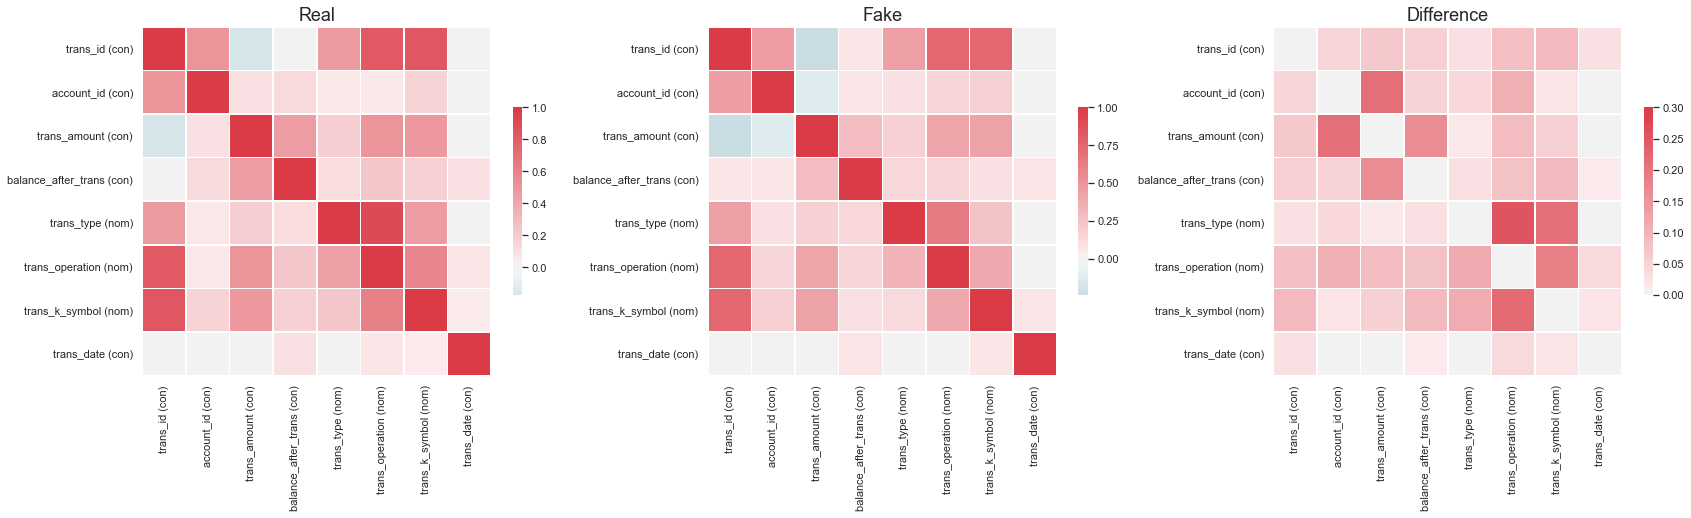

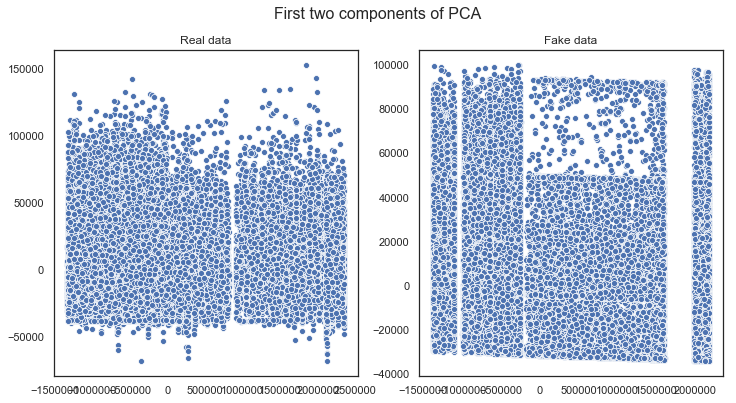

In [16]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [10]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-skip-connections.csv')
skip_evaluator = DataEvaluator(real, fake)

In [13]:
skip_evaluator_2 = TableEvaluator(real, fake)

skip_evaluator_2.get_copies()

In [42]:
skip_evaluator.statistical_evaluation()

0.9849624060150375

In [29]:
skip_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [30]:
skip_evaluator.get_duplicates()

(0, 0)

In [33]:
skip_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7649 0.7648
real_data_RandomForestClassifier_F1 0.9851 0.9813
real_data_DecisionTreeClassifier_F1 0.9811 0.9369
real_data_MLPClassifier_F1          0.5518 0.8398
fake_data_LogisticRegression_F1     0.7227 0.7468
fake_data_RandomForestClassifier_F1 0.9611 0.9698
fake_data_DecisionTreeClassifier_F1 0.9422 0.9436
fake_data_MLPClassifier_F1          0.5723 0.8429

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0560
Column Correlation distance MAE   0.0453
Duplicate rows between sets       2.0000
nearest neighbor mean             0.3807
nearest neighbor std              0.2594

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9850
Correlation column correlations                 0.9832

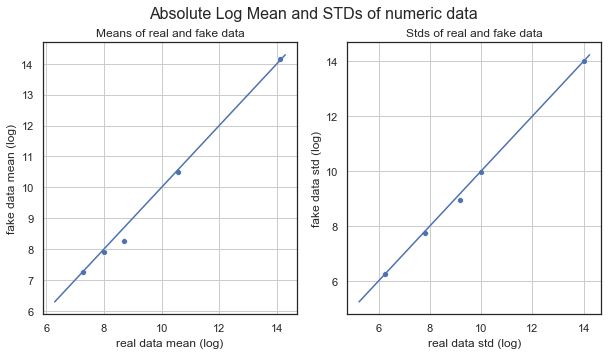

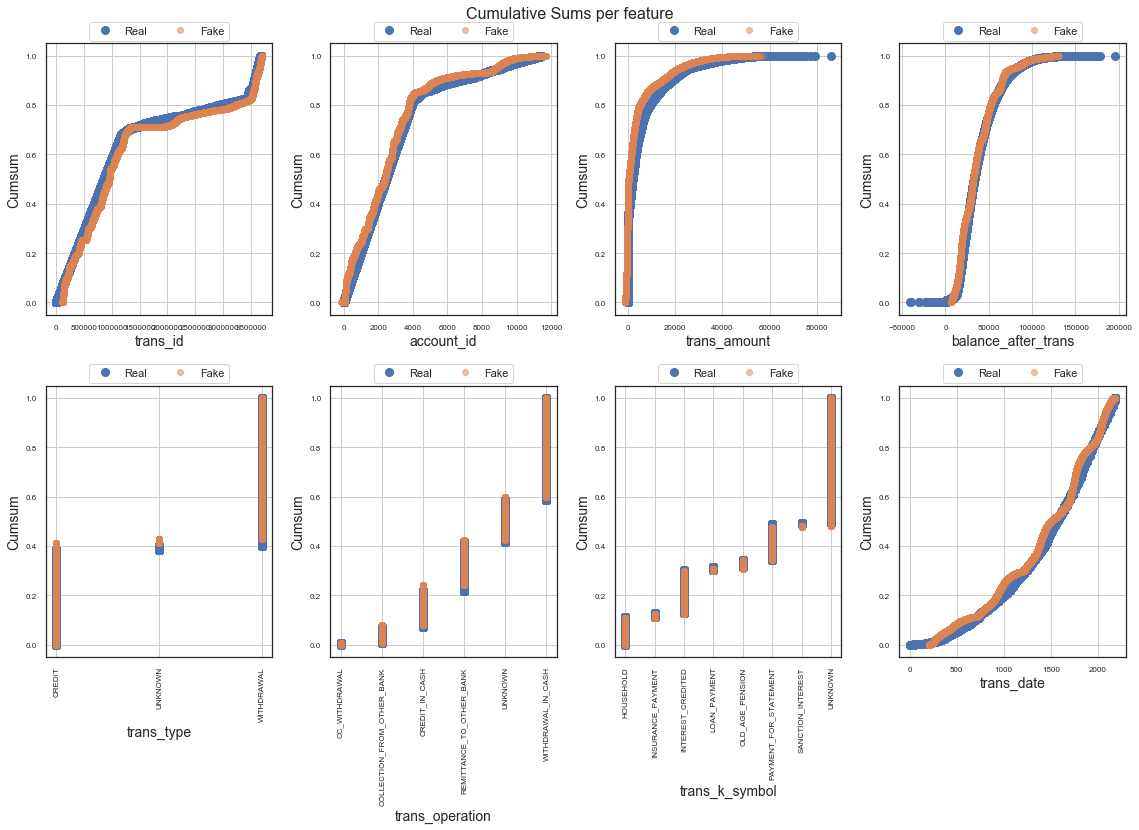

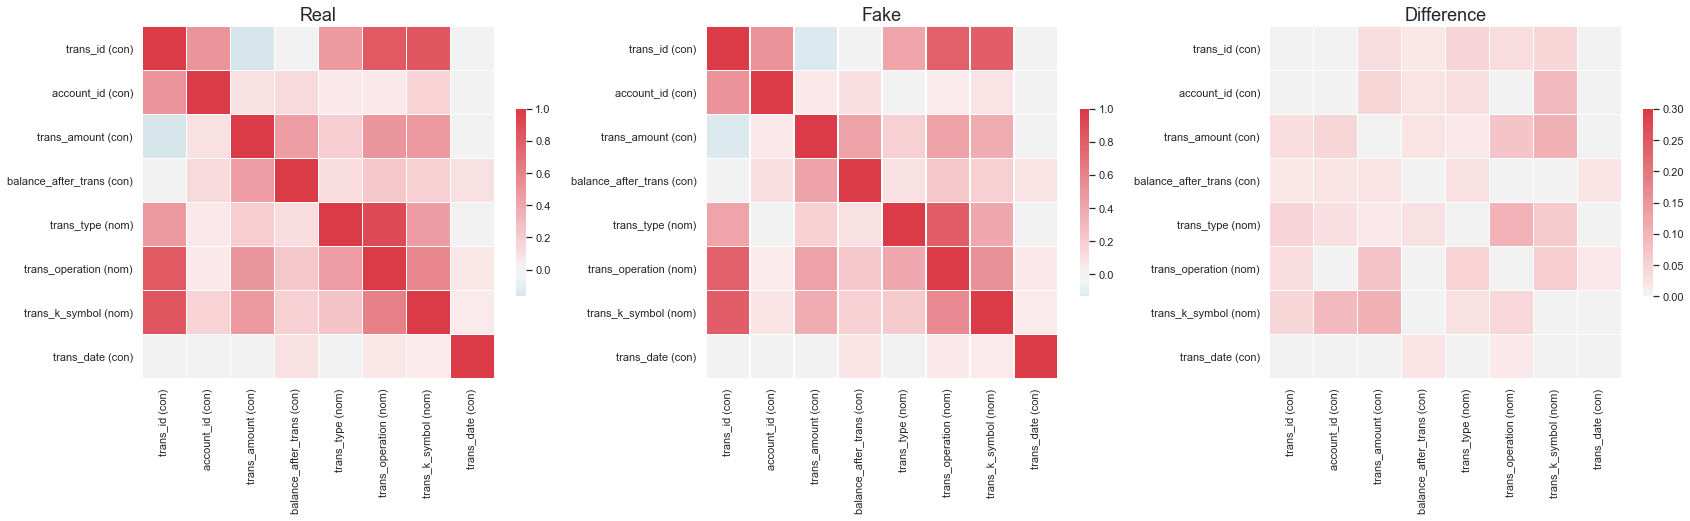

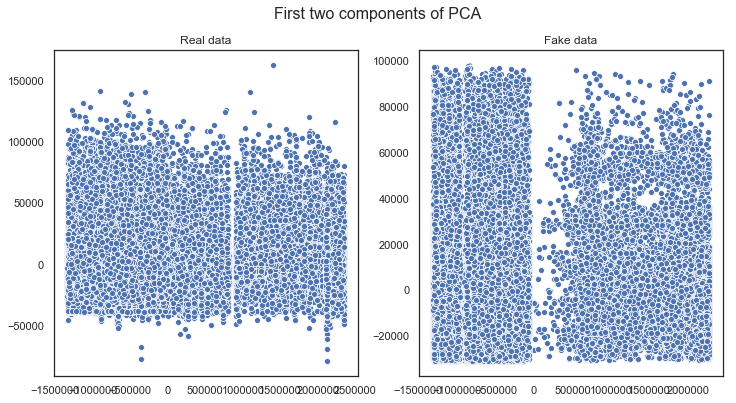

In [18]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [34]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_medgan_100.csv')
medgan_evaluator = DataEvaluator(real, fake)

In [24]:
medgan_evaluator.pca_correlation()

0.08777321936530702

In [43]:
medgan_evaluator.statistical_evaluation()

0.9112781954887217

In [32]:
medgan_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [33]:
medgan_evaluator.get_duplicates()

(0, 7563)

In [35]:
medgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7671 0.7429
real_data_RandomForestClassifier_F1 0.9873 0.7508
real_data_DecisionTreeClassifier_F1 0.9821 0.9045
real_data_MLPClassifier_F1          0.5502 0.7097
fake_data_LogisticRegression_F1     0.1747 0.8659
fake_data_RandomForestClassifier_F1 0.9646 0.9982
fake_data_DecisionTreeClassifier_F1 0.9646 0.9978
fake_data_MLPClassifier_F1          0.8325 0.8329

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.2237
Column Correlation distance MAE   0.1744
Duplicate rows between sets       2.0000
nearest neighbor mean             1.8183
nearest neighbor std              0.5176

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9113
Correlation column correlations                 0.7694

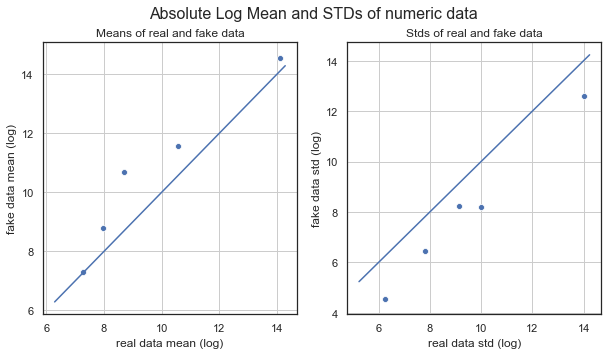

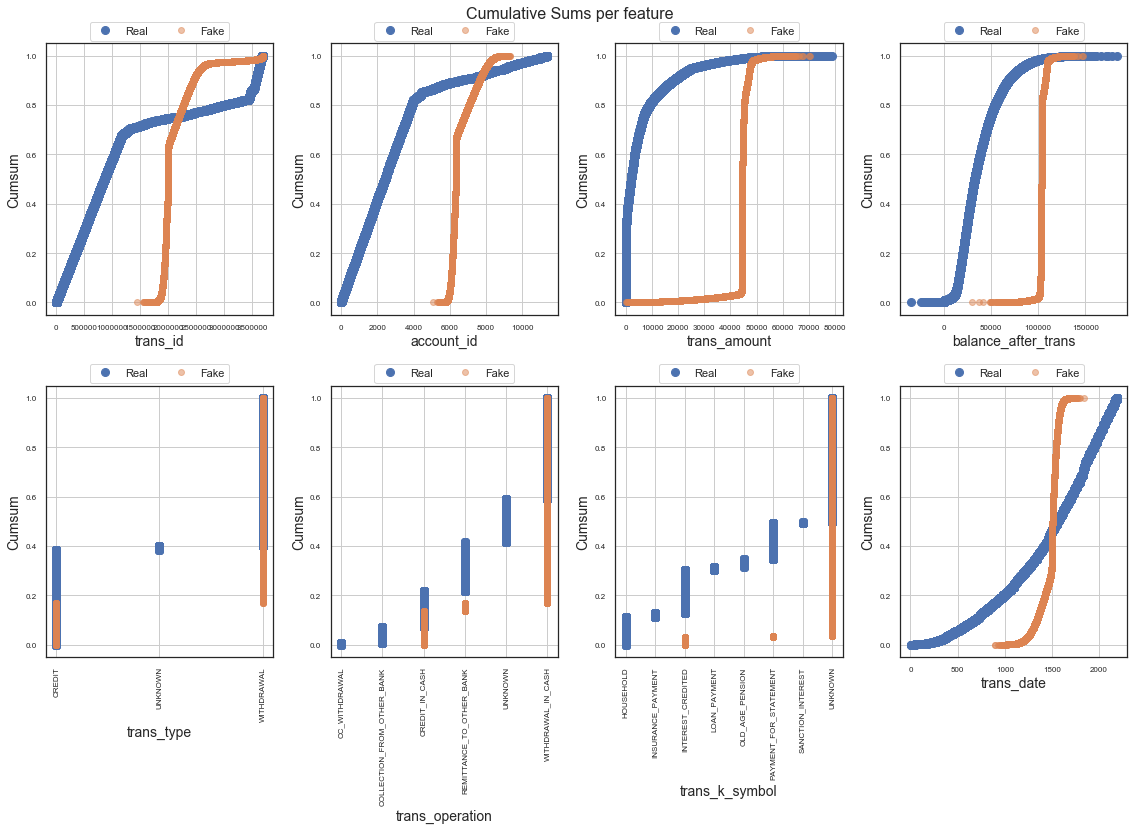

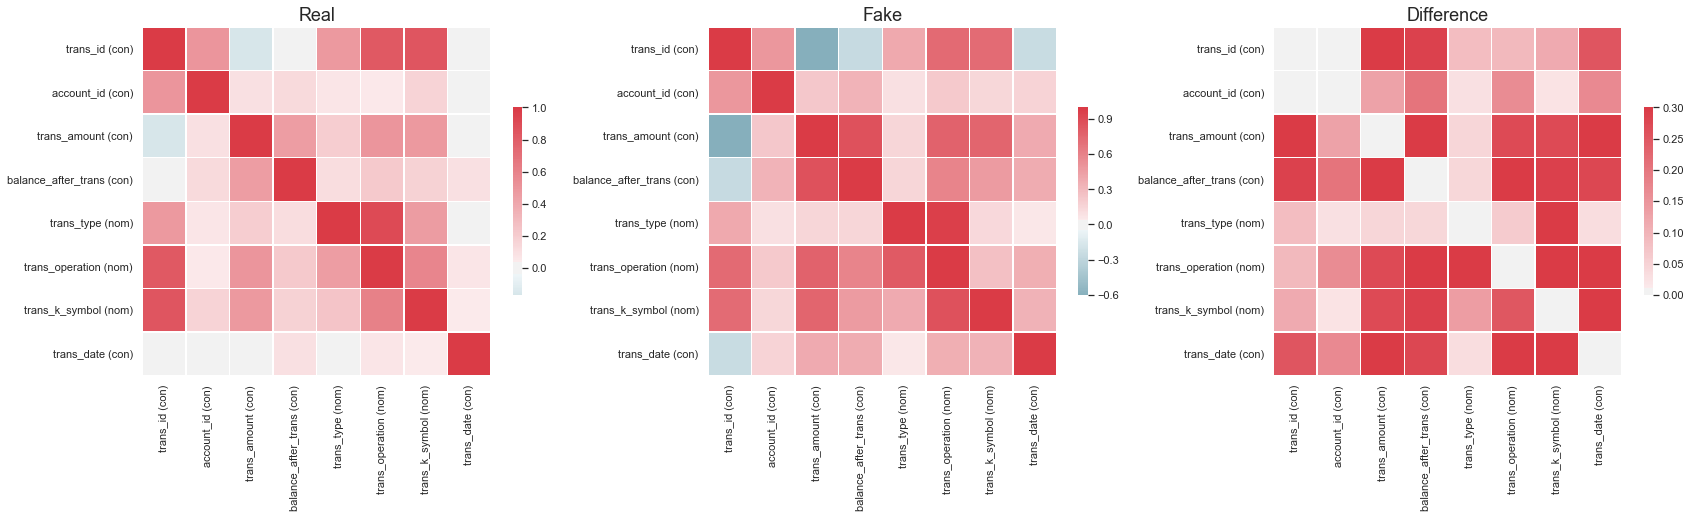

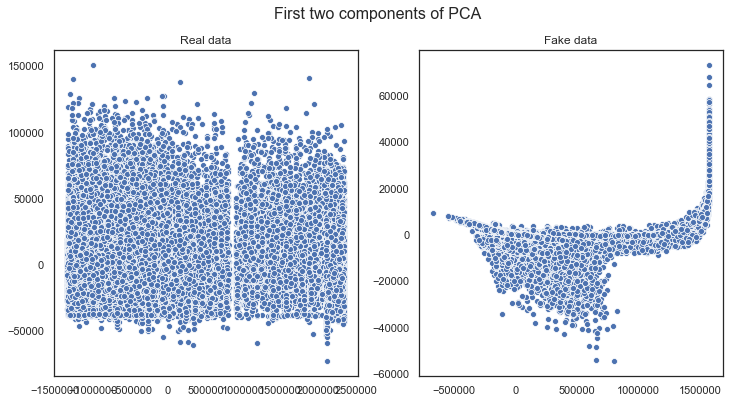

In [20]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [36]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_tablegan_100.csv')
tablegan_evaluator = DataEvaluator(real, fake)

In [25]:
tablegan_evaluator.pca_correlation()

-1.312324855948217

In [44]:
tablegan_evaluator.statistical_evaluation()

0.9894736842105262

In [35]:
tablegan_evaluator.get_copies()

Nr copied columns: 0


,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date


In [36]:
tablegan_evaluator.get_duplicates()

(0, 0)

In [37]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7681 0.7614
real_data_RandomForestClassifier_F1 0.9865 0.9549
real_data_DecisionTreeClassifier_F1 0.9818 0.8952
real_data_MLPClassifier_F1          0.9055 0.5494
fake_data_LogisticRegression_F1     0.6915 0.7043
fake_data_RandomForestClassifier_F1 0.7905 0.9083
fake_data_DecisionTreeClassifier_F1 0.7895 0.8778
fake_data_MLPClassifier_F1          0.6851 0.6309

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.2110
Column Correlation distance MAE   0.1247
Duplicate rows between sets       2.0000
nearest neighbor mean             0.6265
nearest neighbor std              0.5096

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9895
Correlation column correlations                 0.6468

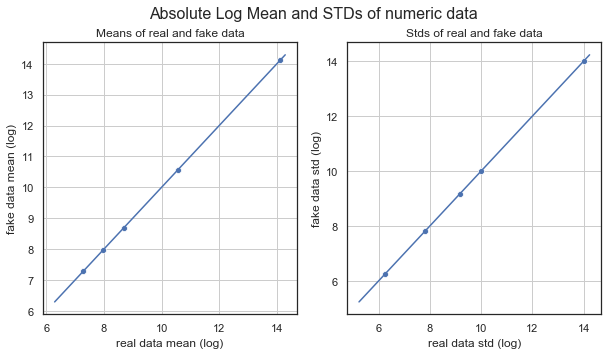

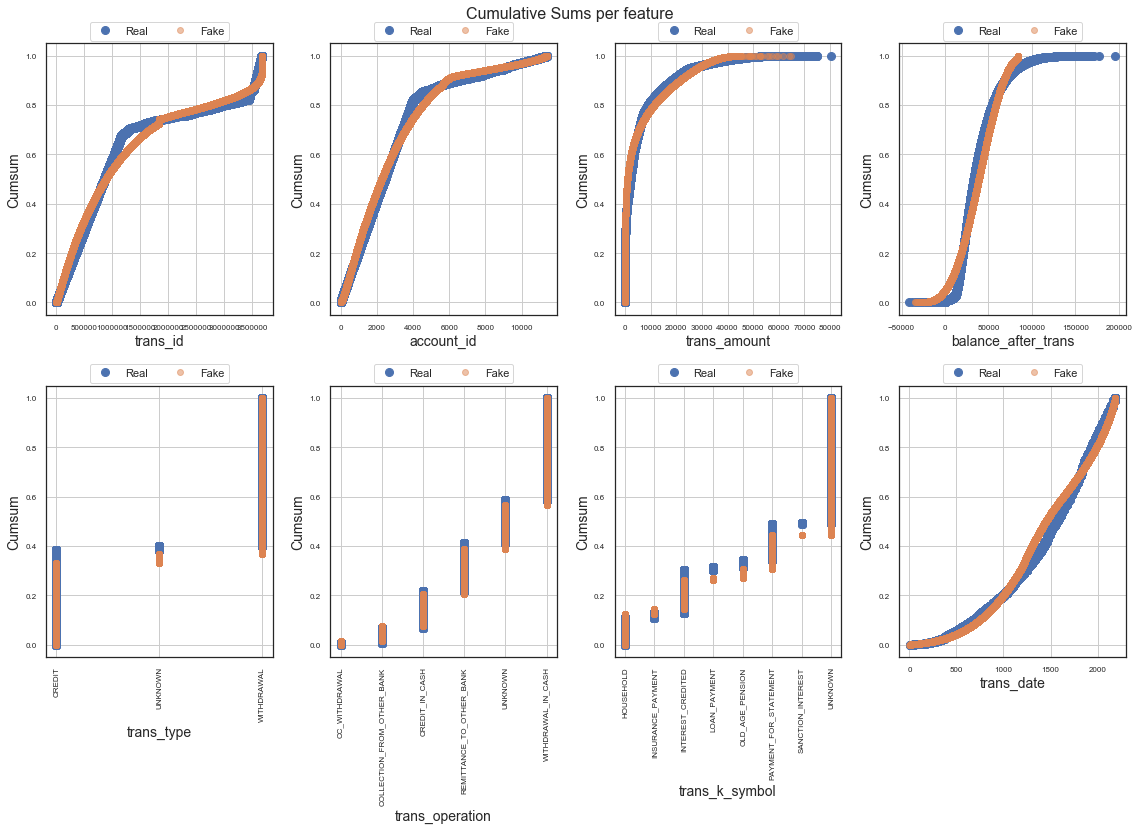

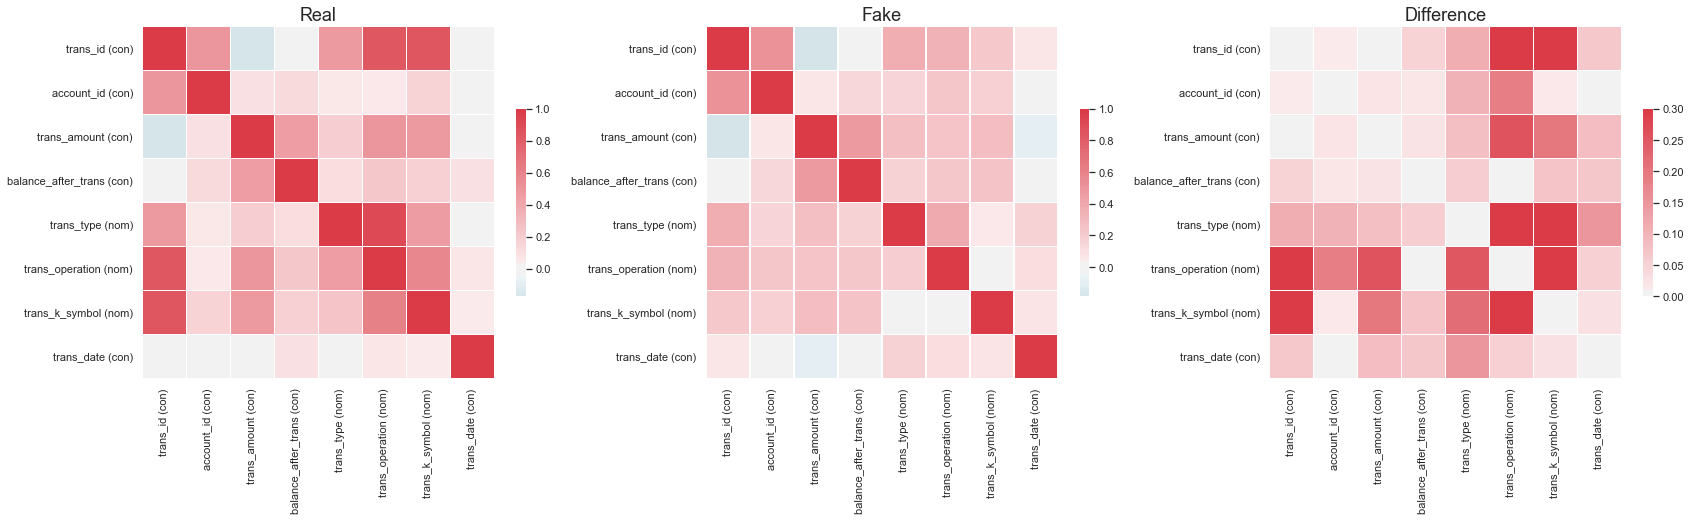

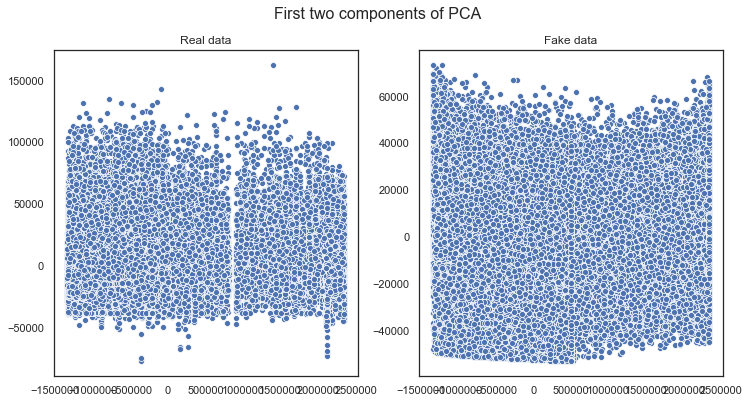

In [22]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [53]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[1.36118739e-02 1.80709275e-02 5.65192718e-02 1.27780790e-02
 7.40933427e-02 5.33174802e-02 2.66024432e-03 7.71583467e-02
 1.26159032e-03 3.56396927e-02 1.73414677e-02 7.66633099e-05
 8.09876193e-03 2.56549043e-03 7.60614708e-02 2.42695190e-01
 3.06023938e-02 1.46246227e-01 1.31201485e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[11  8 13  6 12  3  0 10  1 16  9  5  2  

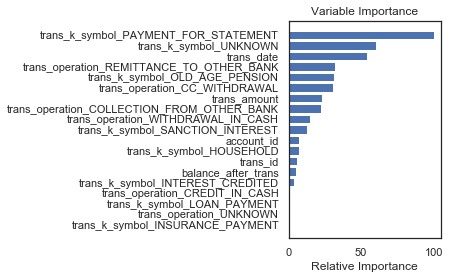

In [54]:
feature_importance = tgan_org_evaluator.f_estimators[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

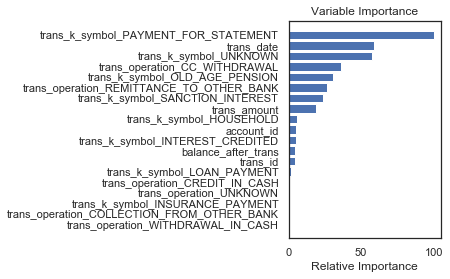

In [55]:
feature_importance = tgan_org_evaluator.r_estimators[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()